In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facial-expression-recognitionferchallenge/Submission.csv
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/README
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.bib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

from tensorflow.keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split

In [ ]:
import os
print(os.listdir("../input"))
data = pd.read_csv('/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
data.shape

['facial-expression-recognitionferchallenge']


(35887, 3)

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [ ]:
emotion_map = {0: ' Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


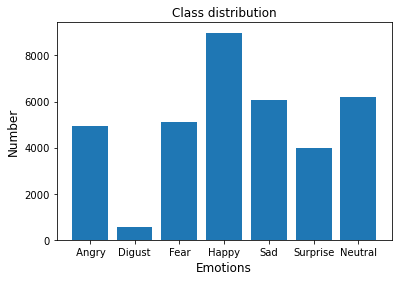

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.show()

In [ ]:
x = []
y = []
first = True
for line in open("/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv"):
    if first:
        first = False
    else:
        row = line.split(',')
        x.append([int(p) for p in row[1].split()])
        y.append(int(row[0]))
x, y = np.array(x) / 255.0, np.array(y)

In [ ]:
x = x.reshape(-1, 48, 48, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [ ]:
num_class = len(set(y))
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
datagen = ImageDataGenerator(
    zoom_range = 0.1,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
    rotation_range = 10,
    horizontal_flip = True,
    vertical_flip = True
)

In [ ]:
datagen.fit(x_train)

In [ ]:
cnn_model = Sequential()

Input_shape = (48, 48, 1)

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform', padding='same',input_shape = Input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform', padding='same',input_shape = Input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units = 7, activation = 'softmax'))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999), metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
history = cnn_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
505/505 [==============================] - 18s 36ms/step - loss: 2.2310 - accuracy: 0.2463 - val_loss: 1.6752 - val_accuracy: 0.3486
Epoch 2/100
505/505 [==============================] - 17s 34ms/step - loss: 1.7663 - accuracy: 0.3227 - val_loss: 1.5266 - val_accuracy: 0.4152
Epoch 3/100
505/505 [==============================] - 17s 34ms/step - loss: 1.6203 - accuracy: 0.3791 - val_loss: 1.4168 - val_accuracy: 0.4581
Epoch 4/100
505/505 [==============================] - 18s 36ms/step - loss: 1.5173 - accuracy: 0.4210 - val_loss: 1.4797 - val_accuracy: 0.4639
Epoch 5/100
505/505 [==============================] - 17s 34ms/step - loss: 1.4258 - accuracy: 0.4515 - val_loss: 1.2614 - val_accuracy: 0.5188
Epoch 6/100
505/505 [==============================] - 17s 33ms/step - loss: 1.3666 - accuracy: 0.4771 - val_loss: 1.2599 - val_accuracy: 0.5177
Epoch 7/100
505/505 [==============================] - 17s 34ms/step - loss: 1.3208 - accuracy: 0.4995 - val_loss: 1.2382 - val_ac

505/505 [==============================] - 17s 34ms/step - loss: 0.9689 - accuracy: 0.6350 - val_loss: 0.9339 - val_accuracy: 0.6498
Epoch 58/100
505/505 [==============================] - 17s 34ms/step - loss: 0.9597 - accuracy: 0.6403 - val_loss: 0.9151 - val_accuracy: 0.6514
Epoch 59/100
505/505 [==============================] - 18s 35ms/step - loss: 0.9657 - accuracy: 0.6406 - val_loss: 0.9541 - val_accuracy: 0.6445
Epoch 60/100
505/505 [==============================] - 17s 34ms/step - loss: 0.9560 - accuracy: 0.6416 - val_loss: 0.9392 - val_accuracy: 0.6450
Epoch 61/100
505/505 [==============================] - 18s 35ms/step - loss: 0.9561 - accuracy: 0.6401 - val_loss: 0.9363 - val_accuracy: 0.6464
Epoch 62/100
505/505 [==============================] - 18s 35ms/step - loss: 0.9514 - accuracy: 0.6429 - val_loss: 1.0024 - val_accuracy: 0.6230
Epoch 63/100
505/505 [==============================] - 18s 36ms/step - loss: 0.9503 - accuracy: 0.6427 - val_loss: 0.9658 - val_accuracy

validation accuracy-65.23 %, validation loss-0.9416